In [1]:
import numpy as np # we need it because we will load pixels as well as labels as arraes this array will be passed to our training model
import pandas as pd #this library is used to read the training and test data set which is in case two CSV files 
import matplotlib.pyplot as plt # i have to know my dataset better so this library helps me to visualize it
import tensorflow as tf#the mind of my friend
from tensorflow import keras#the body of my intelegent friend


In [2]:
readtrain = pd.read_csv("train.csv") .as_matrix()#here we read the training data set, its better to have it as a matrix 

c:\users\rahman\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [3]:
my_train=readtrain[0:37000,1:] #it will load column 1 to the end for each row in matrix as array, 784 pixel
my_label=readtrain[0:37000,0]# the index 0 of this matrix is used to store label of a digit , the label will be 0 to 9

test= readtrain[37000:,1:]#from 31000 to 42000
test_label=readtrain[37000:,0]#labels from 31000 to 42000

In [4]:
my_train = my_train.reshape(-1,28,28)#reshape into 3_dimentional array
test=test.reshape(-1,28,28)#the same as abov ;) but for test set

In [46]:
my_train.shape#is it working well?

(37000, 28, 28)

In [5]:
my_train = tf.keras.utils.normalize(my_train, axis=1)#the numbers are between 255 and 0, but we need 0 to 1 , why?

test = tf.keras.utils.normalize(test, axis=1)#he same as abov ;) but for test set

In [22]:
#the simple model with many usles layer ;)
model3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(392, activation=tf.nn.relu),
    keras.layers.Dense(196, activation=tf.nn.relu),
    keras.layers.Dense(98, activation=tf.nn.relu),
    keras.layers.Dense(49, activation=tf.nn.relu),
    keras.layers.Dense(25, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
#just compile and optimize
model3.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#defining bachsize is somehow tricky smaller bach size make the training longer but more accurate(maybe!) 
model3.fit(my_train,my_label,batch_size=64, epochs=10)

Epoch 1/10
37000/37000 [==============================] - 11s 285us/step - loss: 0.3482 - acc: 0.8932
Epoch 2/10
37000/37000 [==============================] - 10s 261us/step - loss: 0.1258 - acc: 0.9615
Epoch 3/10
37000/37000 [==============================] - 10s 272us/step - loss: 0.0830 - acc: 0.9743
Epoch 4/10
37000/37000 [==============================] - 10s 262us/step - loss: 0.0542 - acc: 0.9821
Epoch 5/10
37000/37000 [==============================] - 10s 262us/step - loss: 0.0443 - acc: 0.9865
Epoch 6/10
37000/37000 [==============================] - 10s 264us/step - loss: 0.0369 - acc: 0.9878
Epoch 7/10
37000/37000 [==============================] - 10s 261us/step - loss: 0.0270 - acc: 0.9908
Epoch 8/10
37000/37000 [==============================] - 10s 275us/step - loss: 0.0274 - acc: 0.9912
Epoch 9/10
37000/37000 [==============================] - 10s 271us/step - loss: 0.0210 - acc: 0.9933
Epoch 10/10
37000/37000 [==============================] - 10s 268us/step - loss: 

In [23]:
#here we can test on a part of dataset which were not envolved in training session
val_loss, val_acc = model3.evaluate(test, test_label)
print(val_loss)
print(val_acc)

5000/5000 [==============================] - 1s 172us/step
0.12865499990344398
0.9714


In [24]:
"""incase of testing in human understandable(what a word!) form, lest see if the prediction is correct in real challenge :D, i have to add an extra dimention 
to the test set so the model will understand it that way.
"""
from numpy import zeros, newaxis
b=test[:,newaxis,:,:]
b[2].shape

(1, 28, 28)

the predicted label is :  9


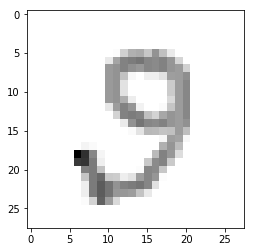

the currect label is : 9


In [26]:
#challenge time UUU ha ha ha 
a=77
predictions_single = model3.predict(b[a])
#print(predictions_single)
prd=np.argmax(predictions_single)
print("the predicted label is : ",prd)
plt.imshow(test[a],cmap=plt.cm.binary)
plt.show()
print ("the currect label is :", test_label[a])
#laugh on wate(dont minde its a persian idiom its jus nonesence )

In [27]:
model3.save('kaggle_digit_recognize3.model')
